# Week 7: Newton's Method

We're going to combine our new mastry of Python control flow to design a non-linear equation solver. Why solve non-linear equations? And what happened to all the methods you've learned to solve for $x$ over the years?

Linear equations are relatively straightforward to solve under certain conditions. But they're maybe not as straightforward as you think -- take Linear Algebra to find out more!  Non-linear equations are everywhere, though, and often it's not easy or possible to derive an analytical solution -- an equation you can write down in terms of familiar functions like addition and multiplication.

Examples include:
- Many isotopic decay equations (my favorite, obviously), which usually involve exponential functions,
- The partial differential equations we use to describe complex systems, like
  - heat flow,
  - advection and diffusion of contaminants in groundwater,
  - the wave equation,
  - the Navier-Stokes equations for fluid dynamics,
- Complex cyclic functions, like those used to describe seasonality, orbital cyclicity, and tides.

Many of these equations, when used in real science applications, don't have an analytical solution. There are many approaches to this problem, with different strengths and weaknesses. **Newton's method**, or the Newton-Raphson method is really fast and it's straightforward to implement.  Here's how it works.

## Newton's Method: An example

Let's start with an example.  Say we want to find out where 
$$x^3 + x^2 = 1.$$

The first thing we'll do is transform this equation so that we are looking for a root, the value of $x$ where $y = 0$.  Easy enough, just subtract 1 from each side:

$$f(x) = x^3 + x^2 - 1 = 0 $$

We know there's at least one place where this function crosses the x-axis -- all cubic functions have one or three real roots.  We want to find out where.  Some inspection and head-scratching do not yield an easy factorization. There's an analytical solution to cubic equations, but nobody would want to memorize it and that's not the point anyway. So we're stuck with a numerical solution. 

## Exercise 1

Let's graph it and see how the function behaves, always a good first step. Plot the function for $x$ between -2 and 2.

<function matplotlib.pyplot.show(close=None, block=None)>

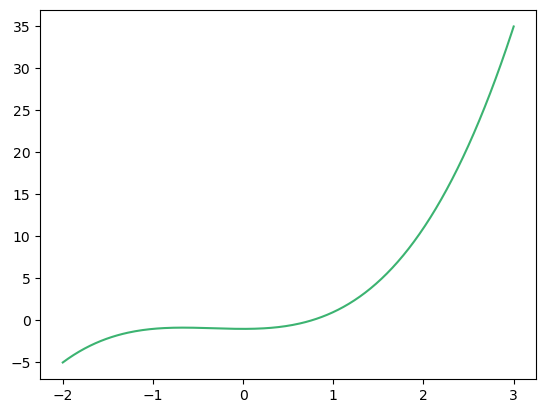

In [4]:
import numpy as np
import matplotlib.pyplot as plt

function_fig, function_ax = plt.subplots()
x_values = np.linspace(-2, 3, 250)
y_values = x_values ** 3 + x_values ** 2 -1
function_ax.plot(x_values, y_values, color="mediumseagreen")

plt.show

# Newton's Method: motivation

Here's Newton's method in a nutshell.  It's a recursive algorithm with just a few steps:
1. Guess an initial value for the root, $x_0$.
2. Evaluate the function there, $y = f(x_0)$.
3. Calculate the slope of the line, $f'(x_0)$ at the location $(x_0, y)$.
4. Using the point on the line and its slope, figure out where it crosses the x-axis. This is your next guess for the root, $x_1$.
5. Repeat! Go back to step 2, using $x_1$ as your new guess.  Evaluate $y = f(x_1)$ and the slope, $f'(x_1)$, to calculate $x_2$. Each repetition will get closer to the root, where $y = f(x_n) = 0$.

Graphically, this image from Wikipedia sums it up nicely:

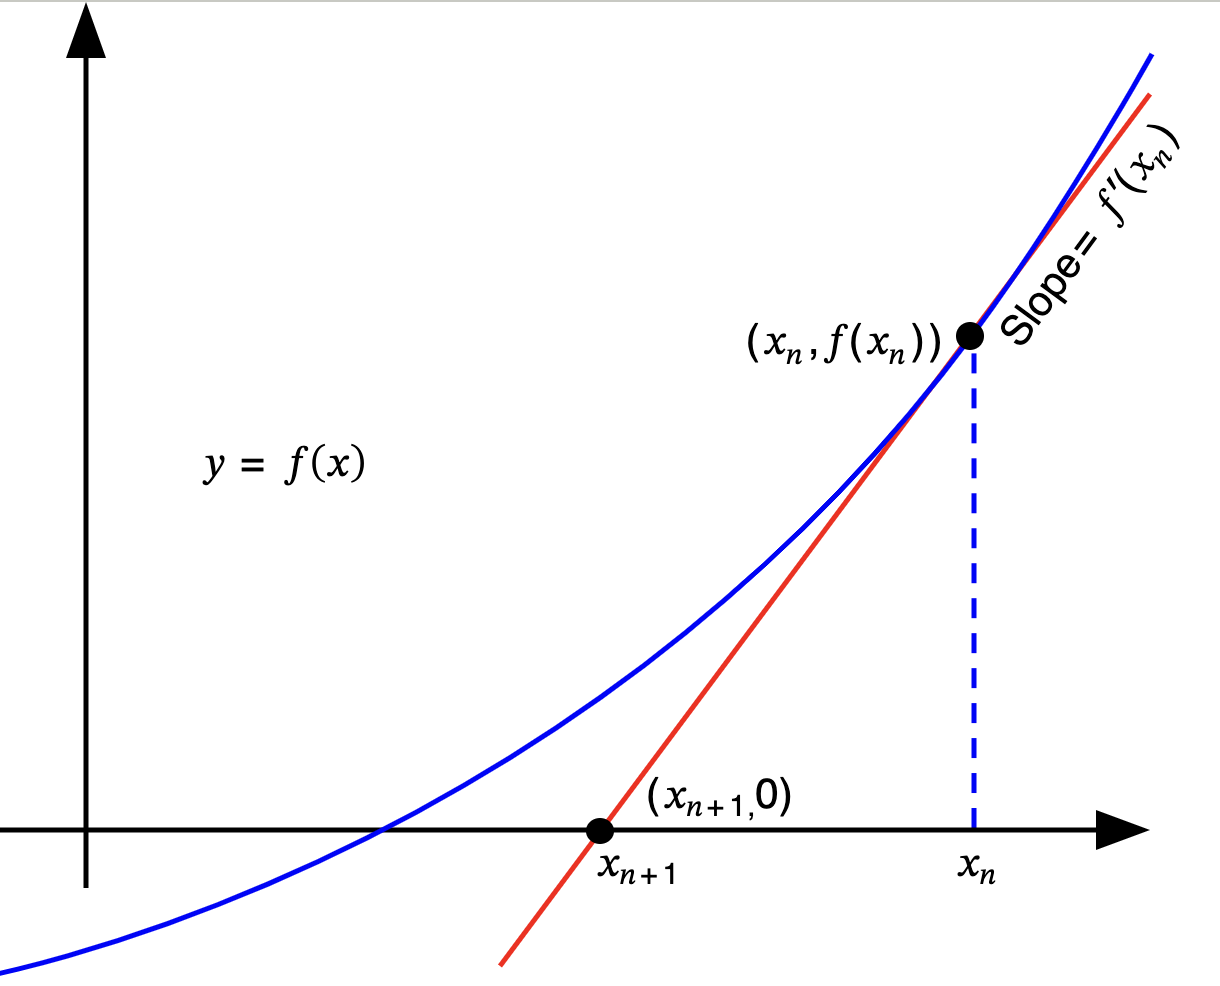

And the simple rule for calculating each successive estimate of the root is the **recursive function**

$$ x_{n + 1} = x_n - \dfrac{f(x_n)}{f'(x_n)} $$

An excellent animation, also from Wikipedia, shows the iterative process, where each successive iteration gets you closer to the root of the function.

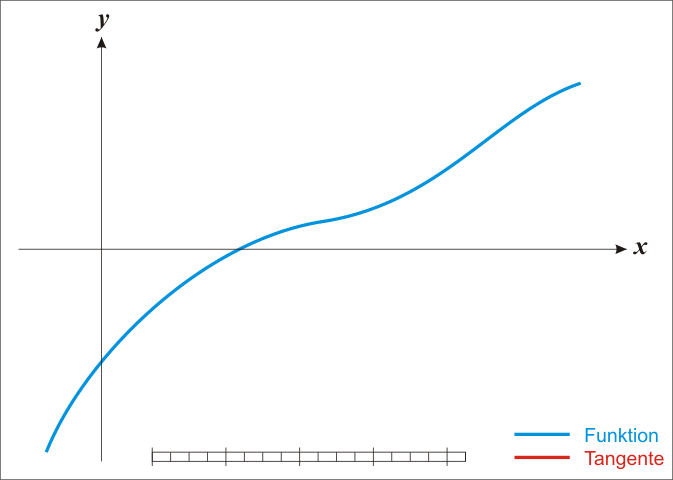

Cool, right?!?

Let's try the process by hand on our toy example.

## Example function revisited

$$ f(x) = x^3 + x^2 - 1 = 0 $$

From our plot, let's start with an initial guess that the root is near $x_0 = 1$.  Now we can compute $f(1) = (1)^3 + (1)^2 - 1 = 1$. So, we know that $x = 1$ is not a root (where $y=0$), but it's not too far off.  Next, we need $f'(1)$, which means we need to calculate the derivative of the $f(x)$. Fortunately, we remember a bit of calculus: 

$$ f'(x) = 3x^2 + 2x $$

and so we calculate $f'(1) = 3(1)^2 + 2(1) = 5$.  

Now we have all the information we need to calculate our next estimate of the root.  Following the rule above,

$$ \begin{aligned}
x_{n + 1}  = & \;x_n - \dfrac{f(x_n)}{f'(x_n)} \\
x_1  = & \; x_0 - \dfrac{f(x_0)}{f'(x_0)} \\
x_1  = & \; 1 - \dfrac{1}{5}
\end{aligned}$$

## Exercise 2

Follow the rule above and do some math in Python or Excel to fill in the rest of this table by making some manual calculations to calculate $x_5$.

|        | $\quad x \quad$ | $\quad f(x) \quad$ | $\quad f'(x) \quad$ |
| ------ | --- | ------ | -------- |
| $x_0=$ |  1  |  1     | 5        |
| $x_1=$ | 0.8 |  1.152 | 3.52     |
| $x_2=$ |     |        |          |
| $x_3=$ |     |        |          |
| $x_4=$ |     |        |          |
| $x_5=$ |     |        |          |

## Testing our answer

By the time we got to $x_5$, you should have noticed that $f(x)$ is veeeeery close to 0 -- we found our root! On your own time, you can figure out what happens if you keep iterating through the recursive formula.  Newton-Raphson is fast!  

Next we want to check to see if we got the right answer.  Here we can consult the actual answer, since we've known how to solve these systems analytically since the 1500s.  Here's the formula for the root of our function
$$ \begin{align}
f(x) = & \; x^3 + x^2 - 1 \quad \textrm{at} \\[10pt]
x = & \; \sqrt[3]{\frac{25}{54} + \frac{\sqrt{69}}{18}} + \sqrt[3]{\frac{25}{54} - \frac{\sqrt{69}}{18}} - \frac{1}{3} 
\end{align}
$$

which comes out to about $x = 0.75488$.  Is that what you got?  Can you confirm that this value of $x$ is a root of our function $f(x)$?

## Sketching our recursive algorithm

We're on our way to writing our first piece of scientifically useful code. But it's more complicated than the code we've implemented before. One strategy for writing more complicated algorithms is to sketch out some comments that describe what we want the code to do, then add in the actual Python code to implement our plan.

Using the code cell below, add comments (no other code yet!) to implement Newton's method.

In [ ]:
# import packages

# define the functions f(x) and f'(x) as functions

# make an initial guess of the root x_0

# create a for loop to do the recursive function for Newton's Method:

    # calculate f(x) and f'(x)

    # calculate next x value, x_n+1

    # check if we found the root: is f(x) = 0 ?
        # if true, print the root and stop the loop!
        # if false, loop again



## Coding the recursive algorithm

Now code up the recursive algorithm you've sketched out. Copy your comments down, then add in the corresponding code underneath each comment.

You don't need this information to write a working version of Newton's method, but maybe it would be handy.
1. The keyword `break` will stop the execution of a `for` loop. The code keeps going, but the `for` loop is considered complete, even though it didn't go through all its iterations.
2. Just like an `if` statement, a `for` loop can have an `else:` block. The `else:` block is run if the `for` loop gets all the way to the end without encountering the `break` keyword.

In [21]:
# import packages
import numpy as np

# define the functions f(x) and f'(x) as functions
def cub_fun(x):
    return x**3 + x**2 - 1

def cub_deriv(x):
    return 3*x**2 + 2*x

# make an initial guess of the root x_0 and establish loop number
initial_x = 1
max_loops = 100
tolerance = 1e-15

x_estimates = np.zeros(max_loops+1)
f_estimates = np.zeros(max_loops)
fprime_estimates = np.zeros(max_loops)

x_estimates[0] = initial_x

# create a for loop to do the recursive function for Newton's Method:
for idx in range(max_loops+1):
    
    # calculate f(x) and f'(x)
    x_current = x_estimates[idx]
    fx = cub_fun(x_current)
    fprimex = cub_deriv(x_current)
    
    # calculate next x value, x_n+1
    xnew = x_current - (fx/fprimex)
    x_estimates[idx + 1] = xnew
    
    # check if we found the root: is f(x) = 0 ?
    if abs(fx) <= tolerance:
        # if true, print the root and stop the loop!
        print("You found the root!", xnew)
        break
        
else: # if the for loop reaches max_loops
    print("I never found a loop :(")



You found the root! 0.7548776662466927


## Testing your code

Now it's time to test your code. Did it come up with the solution you found and confirmed by hand?  Testing your code is just as important as writing it!!!

## Other functions

Here are some other simple functions you can solve now.

1. Solve $x e^x = 2$ for $x$.
2. In U-Pb geochronology, we measure the isotope ratio $^{207}$Pb/$^{206}$Pb. Using that ratio, we can calculate an age using the equation

$$ \dfrac{^{207}\textrm{Pb}}{^{206}\textrm{Pb}} = \dfrac{1}{137.818} \dfrac{\exp(\lambda_{235} t) - 1}{\exp(\lambda_{238} t) - 1} $$

where $\lambda_{235} = 9.8485 \times 10^{-10}$ yr$^{-1}$, and $\lambda_{238} = 1.55125 \times 10^{-10}$ yr$^{-1}$ and $t$ is the age in years.  If I measure a $^{207}$Pb/$^{206}$Pb ratio of 0.1, how old is the rock?